In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from PIL import Image

# Define paths
frames_path = "/kaggle/input/dataset-echonet-ped/DATASET/frames"
masks_path = "/kaggle/input/dataset-echonet-ped/DATASET/videos_mask"

# Fixed dataset exploration
def explore_dataset():
    # Get all files in frames and masks directories
    frame_files = [f for f in os.listdir(frames_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    mask_files = [f for f in os.listdir(masks_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"Number of frame files: {len(frame_files)}")
    print(f"Number of mask files: {len(mask_files)}")
    
    # Check matching files
    frame_set = set(frame_files)
    mask_set = set(mask_files)
    
    matching_files = frame_set.intersection(mask_set)
    print(f"Matching files: {len(matching_files)}")
    print(f"Frames only: {len(frame_set - mask_set)}")
    print(f"Masks only: {len(mask_set - frame_set)}")
    
    return sorted(list(matching_files))

# Get matching files
matching_files = explore_dataset()
print(f"\nFirst 5 matching files: {matching_files[:5]}")

Number of frame files: 6423
Number of mask files: 6423
Matching files: 6423
Frames only: 0
Masks only: 0

First 5 matching files: ['CR32a7555-CR32a7582-000039_frame_27.png', 'CR32a7555-CR32a7582-000039_frame_39.png', 'CR32a7555-CR32a97af-000033_frame_22.png', 'CR32a7555-CR32a97af-000033_frame_6.png', 'CR32a7555-CR32a97e1-000024_frame_9.png']


Frame shape: (112, 112, 3), Mask shape: (112, 112)
Frame shape: (112, 112, 3), Mask shape: (112, 112)
Frame shape: (112, 112, 3), Mask shape: (112, 112)


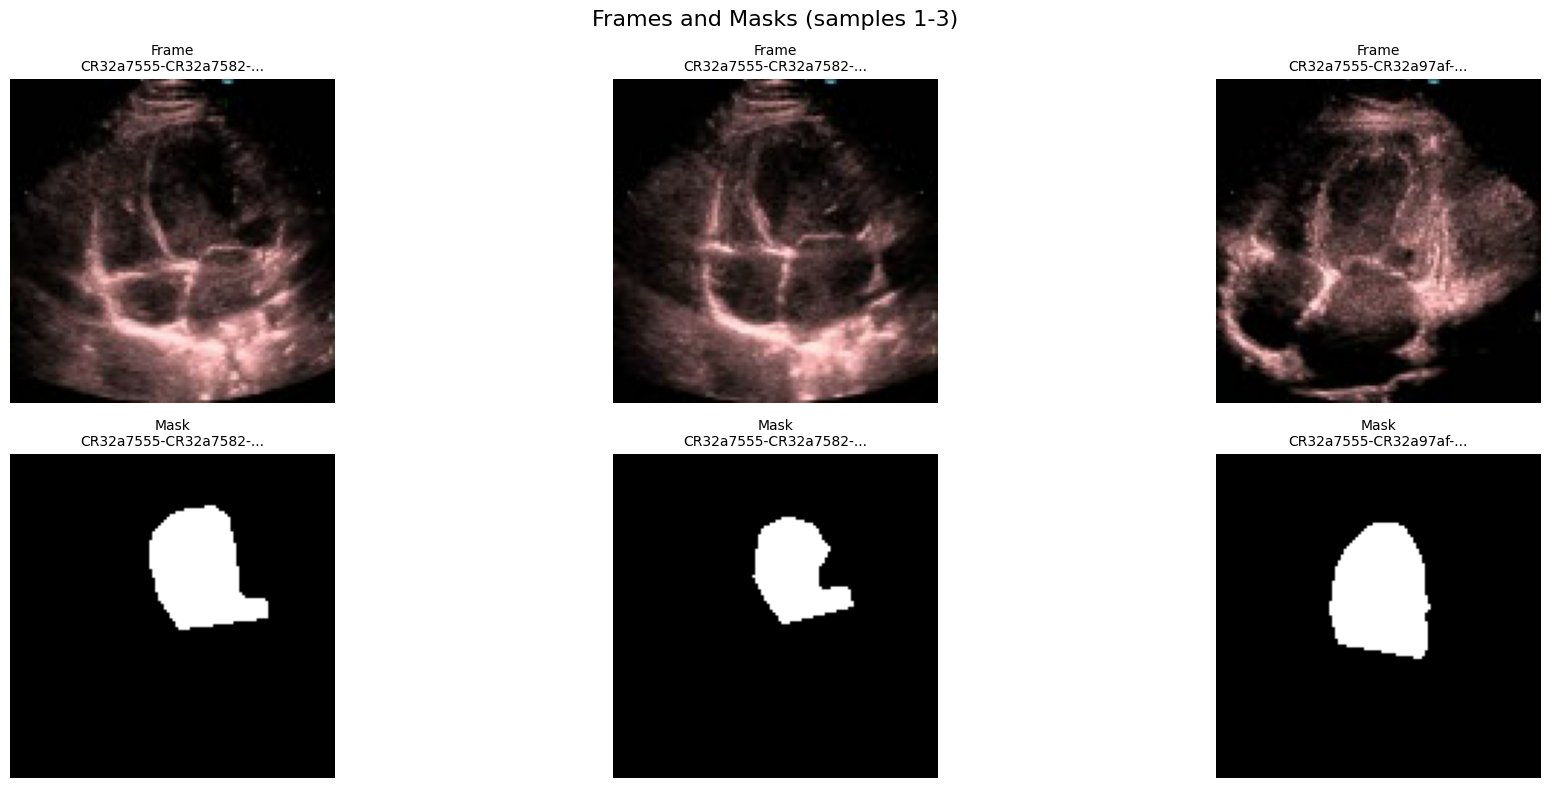

In [6]:
# Fixed visualization function
def visualize_frames_and_masks(file_list, num_samples=5, start_idx=0):
    """Visualize frames and their corresponding masks"""
    
    # Select sample files
    end_idx = min(start_idx + num_samples, len(file_list))
    sample_files = file_list[start_idx:end_idx]
    
    fig, axes = plt.subplots(2, len(sample_files), figsize=(20, 8))
    if len(sample_files) == 1:
        axes = axes.reshape(2, 1)
    
    fig.suptitle(f'Frames and Masks (samples {start_idx+1}-{end_idx})', fontsize=16)
    
    for i, filename in enumerate(sample_files):
        # Load frame
        frame_path = os.path.join(frames_path, filename)
        mask_path = os.path.join(masks_path, filename)
        
        if os.path.exists(frame_path) and os.path.exists(mask_path):
            # Load and display frame
            frame = cv2.imread(frame_path)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Load and display mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            # Display frame
            axes[0, i].imshow(frame)
            axes[0, i].set_title(f'Frame\n{filename[:20]}...', fontsize=10)
            axes[0, i].axis('off')
            
            # Display mask
            axes[1, i].imshow(mask, cmap='gray')
            axes[1, i].set_title(f'Mask\n{filename[:20]}...', fontsize=10)
            axes[1, i].axis('off')
            
            print(f"Frame shape: {frame.shape}, Mask shape: {mask.shape}")
        else:
            axes[0, i].text(0.5, 0.5, 'File not found', ha='center', va='center')
            axes[1, i].text(0.5, 0.5, 'File not found', ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

# Visualize first batch
if matching_files:
    visualize_frames_and_masks(matching_files, num_samples=3)

In [7]:
# Dataset statistics
def get_detailed_stats():
    """Get detailed statistics about the dataset"""
    stats = []
    
    # Sample some files for analysis
    sample_files = matching_files[:20] if len(matching_files) > 20 else matching_files
    
    for filename in sample_files:
        frame_path = os.path.join(frames_path, filename)
        mask_path = os.path.join(masks_path, filename)
        
        if os.path.exists(frame_path) and os.path.exists(mask_path):
            # Get frame info
            frame = cv2.imread(frame_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            # Calculate mask statistics
            unique_vals = np.unique(mask)
            mask_coverage = (mask > 0).sum() / mask.size
            
            stats.append({
                'filename': filename,
                'frame_shape': frame.shape if frame is not None else None,
                'mask_shape': mask.shape if mask is not None else None,
                'mask_unique_values': len(unique_vals),
                'mask_min': mask.min() if mask is not None else None,
                'mask_max': mask.max() if mask is not None else None,
                'mask_coverage': mask_coverage if mask is not None else None
            })
    
    return pd.DataFrame(stats)

# Get and display stats
df_stats = get_detailed_stats()
print("Dataset Statistics:")
print(df_stats.head(10))
print("\nSummary:")
print(df_stats.describe())

Dataset Statistics:
                                  filename    frame_shape  mask_shape  \
0  CR32a7555-CR32a7582-000039_frame_27.png  (112, 112, 3)  (112, 112)   
1  CR32a7555-CR32a7582-000039_frame_39.png  (112, 112, 3)  (112, 112)   
2  CR32a7555-CR32a97af-000033_frame_22.png  (112, 112, 3)  (112, 112)   
3   CR32a7555-CR32a97af-000033_frame_6.png  (112, 112, 3)  (112, 112)   
4   CR32a7555-CR32a97e1-000024_frame_9.png  (112, 112, 3)  (112, 112)   
5  CR32a7555-CR32a9850-000040_frame_21.png  (112, 112, 3)  (112, 112)   
6   CR32a7555-CR32a9850-000040_frame_4.png  (112, 112, 3)  (112, 112)   
7  CR32a7555-CR32a988d-000034_frame_55.png  (112, 112, 3)  (112, 112)   
8  CR32a7555-CR32a988d-000034_frame_72.png  (112, 112, 3)  (112, 112)   
9  CR32a7555-CR32a9973-000041_frame_35.png  (112, 112, 3)  (112, 112)   

   mask_unique_values  mask_min  mask_max  mask_coverage  
0                   2         0       255       0.092953  
1                   2         0       255       0.064015  

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import cv2

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define paths (from previous code)
frames_path = "/kaggle/input/dataset-echonet-ped/DATASET/frames"
masks_path = "/kaggle/input/dataset-echonet-ped/DATASET/videos_mask"

# Get matching files (from previous code)
frame_files = [f for f in os.listdir(frames_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
mask_files = [f for f in os.listdir(masks_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
matching_files = sorted(list(set(frame_files).intersection(set(mask_files))))

print(f"Total matching files: {len(matching_files)}")

# Train-Test Split
train_files, test_files = train_test_split(
    matching_files, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

# Further split train into train and validation
train_files, val_files = train_test_split(
    train_files,
    test_size=0.2,  # 20% of train set for validation
    random_state=42,
    shuffle=True
)

print(f"Train files: {len(train_files)}")
print(f"Validation files: {len(val_files)}")
print(f"Test files: {len(test_files)}")

Total matching files: 6423
Train files: 4110
Validation files: 1028
Test files: 1285


In [9]:
class EchoNetDataset(Dataset):
    def __init__(self, frames_path, masks_path, file_list, transform=None, mask_transform=None, augment=False):
        self.frames_path = frames_path
        self.masks_path = masks_path
        self.file_list = file_list
        self.transform = transform
        self.mask_transform = mask_transform
        self.augment = augment
        
        # Filter valid files
        self.valid_files = []
        for filename in file_list:
            frame_path = os.path.join(frames_path, filename)
            mask_path = os.path.join(masks_path, filename)
            if os.path.exists(frame_path) and os.path.exists(mask_path):
                self.valid_files.append(filename)
        
        print(f"Valid file pairs: {len(self.valid_files)} out of {len(file_list)}")
    
    def __len__(self):
        return len(self.valid_files)
    
    def __getitem__(self, idx):
        filename = self.valid_files[idx]
        
        frame_path = os.path.join(self.frames_path, filename)
        mask_path = os.path.join(self.masks_path, filename)
        
        # Load frame and mask
        frame = Image.open(frame_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        # Convert to numpy for augmentation
        if self.augment:
            frame_np = np.array(frame)
            mask_np = np.array(mask)
            
            # Random horizontal flip
            if np.random.random() > 0.5:
                frame_np = np.fliplr(frame_np)
                mask_np = np.fliplr(mask_np)
            
            # Random rotation (-15 to 15 degrees)
            if np.random.random() > 0.5:
                angle = np.random.uniform(-15, 15)
                h, w = frame_np.shape[:2]
                center = (w // 2, h // 2)
                matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
                frame_np = cv2.warpAffine(frame_np, matrix, (w, h))
                mask_np = cv2.warpAffine(mask_np, matrix, (w, h))
            
            frame = Image.fromarray(frame_np)
            mask = Image.fromarray(mask_np)
        
        # Apply transforms
        if self.transform:
            frame = self.transform(frame)
        
        if self.mask_transform:
            mask = self.mask_transform(mask)
            
        # Ensure mask is binary (0 or 1)
        mask = (mask > 0.5).float()
        
        return frame, mask

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

mask_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Create datasets
train_dataset = EchoNetDataset(
    frames_path, masks_path, train_files, 
    transform=train_transform, mask_transform=mask_transform, augment=True
)

val_dataset = EchoNetDataset(
    frames_path, masks_path, val_files,
    transform=val_transform, mask_transform=mask_transform, augment=False
)

test_dataset = EchoNetDataset(
    frames_path, masks_path, test_files,
    transform=val_transform, mask_transform=mask_transform, augment=False
)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Valid file pairs: 4110 out of 4110
Valid file pairs: 1028 out of 1028
Valid file pairs: 1285 out of 1285
Train dataset size: 4110
Validation dataset size: 1028
Test dataset size: 1285


In [10]:
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=1, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=3, n_classes=1, bilinear=False).to(device)

print(f"Using device: {device}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

Using device: cuda
Model parameters: 31,037,633


In [11]:
# Loss functions
class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, pred, target):
        pred = torch.sigmoid(pred)
        
        # Flatten tensors
        pred = pred.view(-1)
        target = target.view(-1)
        
        intersection = (pred * target).sum()
        dice = (2. * intersection + self.smooth) / (pred.sum() + target.sum() + self.smooth)
        
        return 1 - dice

class CombinedLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(CombinedLoss, self).__init__()
        self.alpha = alpha
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss()

    def forward(self, pred, target):
        bce_loss = self.bce(pred, target)
        dice_loss = self.dice(pred, target)
        return self.alpha * bce_loss + (1 - self.alpha) * dice_loss

# Training parameters
batch_size = 8
num_epochs = 20
learning_rate = 1e-4

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Optimizer and loss
criterion = CombinedLoss(alpha=0.5)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

print(f"Batch size: {batch_size}")
print(f"Number of epochs: {num_epochs}")
print(f"Learning rate: {learning_rate}")

Batch size: 8
Number of epochs: 20
Learning rate: 0.0001


In [13]:
def calculate_metrics(pred, target, threshold=0.5):
    """Calculate IoU, Dice, and Pixel Accuracy"""
    pred_binary = (torch.sigmoid(pred) > threshold).float()
    target_binary = target
    
    # Flatten tensors
    pred_flat = pred_binary.view(-1)
    target_flat = target_binary.view(-1)
    
    # IoU
    intersection = (pred_flat * target_flat).sum()
    union = pred_flat.sum() + target_flat.sum() - intersection
    iou = (intersection + 1e-8) / (union + 1e-8)
    
    # Dice
    dice = (2 * intersection + 1e-8) / (pred_flat.sum() + target_flat.sum() + 1e-8)
    
    # Pixel Accuracy
    correct = (pred_flat == target_flat).sum()
    pixel_acc = correct / target_flat.numel()
    
    return iou.item(), dice.item(), pixel_acc.item()

def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_iou = 0.0
    running_dice = 0.0
    running_acc = 0.0
    
    for batch_idx, (images, masks) in enumerate(train_loader):
        images, masks = images.to(device), masks.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        iou, dice, acc = calculate_metrics(outputs, masks)
        
        running_loss += loss.item()
        running_iou += iou
        running_dice += dice
        running_acc += acc
        
        if batch_idx % 10 == 0:
            print(f'Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}, IoU: {iou:.4f}')
    
    epoch_loss = running_loss / len(train_loader)
    epoch_iou = running_iou / len(train_loader)
    epoch_dice = running_dice / len(train_loader)
    epoch_acc = running_acc / len(train_loader)
    
    return epoch_loss, epoch_iou, epoch_dice, epoch_acc

def validate_epoch(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_iou = 0.0
    running_dice = 0.0
    running_acc = 0.0
    
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            # Calculate metrics
            iou, dice, acc = calculate_metrics(outputs, masks)
            
            running_loss += loss.item()
            running_iou += iou
            running_dice += dice
            running_acc += acc
    
    epoch_loss = running_loss / len(val_loader)
    epoch_iou = running_iou / len(val_loader)
    epoch_dice = running_dice / len(val_loader)
    epoch_acc = running_acc / len(val_loader)
    
    return epoch_loss, epoch_iou, epoch_dice, epoch_acc

In [14]:
# Training history
train_losses = []
val_losses = []
train_ious = []
val_ious = []
train_dices = []
val_dices = []

best_val_iou = 0.0
best_model_path = '/kaggle/working/best_unet_model.pth'

print("Starting training...")
print("=" * 50)

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 30)
    
    # Train
    train_loss, train_iou, train_dice, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, device
    )
    
    # Validate
    val_loss, val_iou, val_dice, val_acc = validate_epoch(
        model, val_loader, criterion, device
    )
    
    # Update learning rate
    scheduler.step(val_loss)
    
    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_ious.append(train_iou)
    val_ious.append(val_iou)
    train_dices.append(train_dice)
    val_dices.append(val_dice)
    
    print(f'Train Loss: {train_loss:.4f}, IoU: {train_iou:.4f}, Dice: {train_dice:.4f}, Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, IoU: {val_iou:.4f}, Dice: {val_dice:.4f}, Acc: {val_acc:.4f}')
    print(f'Current LR: {optimizer.param_groups[0]["lr"]:.6f}')
    
    # Save best model
    if val_iou > best_val_iou:
        best_val_iou = val_iou
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_iou': val_iou,
            'val_loss': val_loss
        }, best_model_path)
        print(f'New best model saved! Val IoU: {val_iou:.4f}')
    
    print()

print("Training completed!")
print(f"Best validation IoU: {best_val_iou:.4f}")

Starting training...
Epoch 1/20
------------------------------
Batch 0/514, Loss: 0.7574, IoU: 0.1230
Batch 10/514, Loss: 0.6967, IoU: 0.1931
Batch 20/514, Loss: 0.6160, IoU: 0.3515
Batch 30/514, Loss: 0.4961, IoU: 0.5918
Batch 40/514, Loss: 0.4918, IoU: 0.5880
Batch 50/514, Loss: 0.4217, IoU: 0.7423
Batch 60/514, Loss: 0.4313, IoU: 0.7146
Batch 70/514, Loss: 0.4616, IoU: 0.6560
Batch 80/514, Loss: 0.4907, IoU: 0.5631
Batch 90/514, Loss: 0.3979, IoU: 0.7314
Batch 100/514, Loss: 0.3770, IoU: 0.7674
Batch 110/514, Loss: 0.3743, IoU: 0.7060
Batch 120/514, Loss: 0.3691, IoU: 0.7635
Batch 130/514, Loss: 0.4675, IoU: 0.5640
Batch 140/514, Loss: 0.3775, IoU: 0.7431
Batch 150/514, Loss: 0.3585, IoU: 0.7598
Batch 160/514, Loss: 0.4318, IoU: 0.6032
Batch 170/514, Loss: 0.4042, IoU: 0.6587
Batch 180/514, Loss: 0.3840, IoU: 0.7069
Batch 190/514, Loss: 0.3662, IoU: 0.6819
Batch 200/514, Loss: 0.3809, IoU: 0.7145
Batch 210/514, Loss: 0.3539, IoU: 0.7716
Batch 220/514, Loss: 0.3318, IoU: 0.7434
Batch

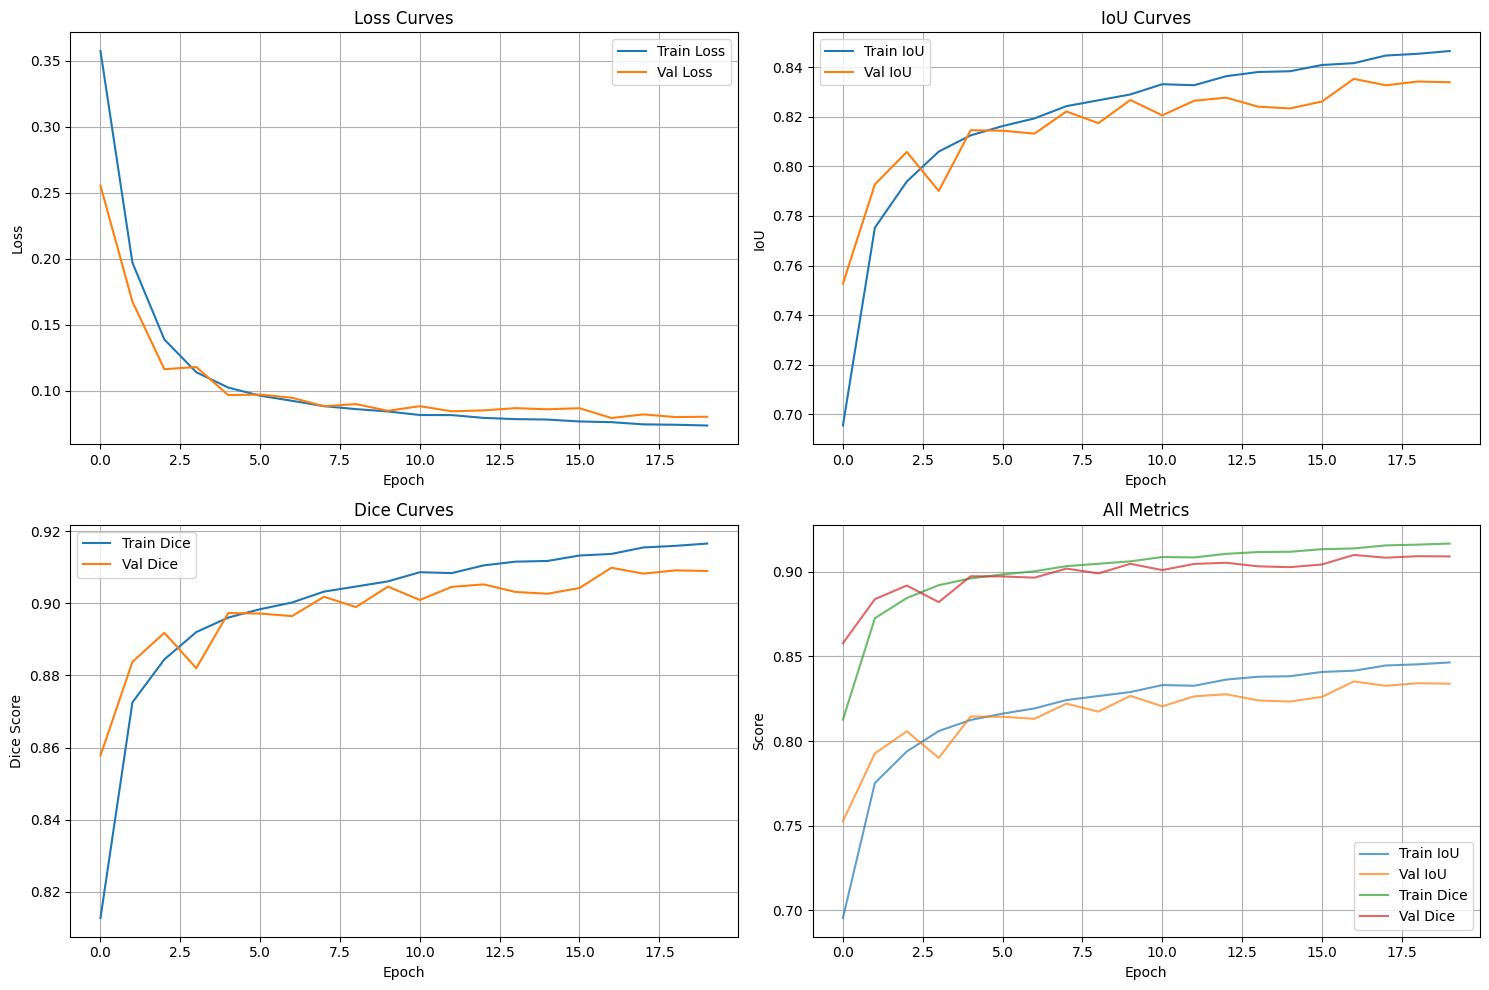

Test Results:
Loss: 0.0796
IoU: 0.8344
Dice: 0.9095
Accuracy: 0.9795


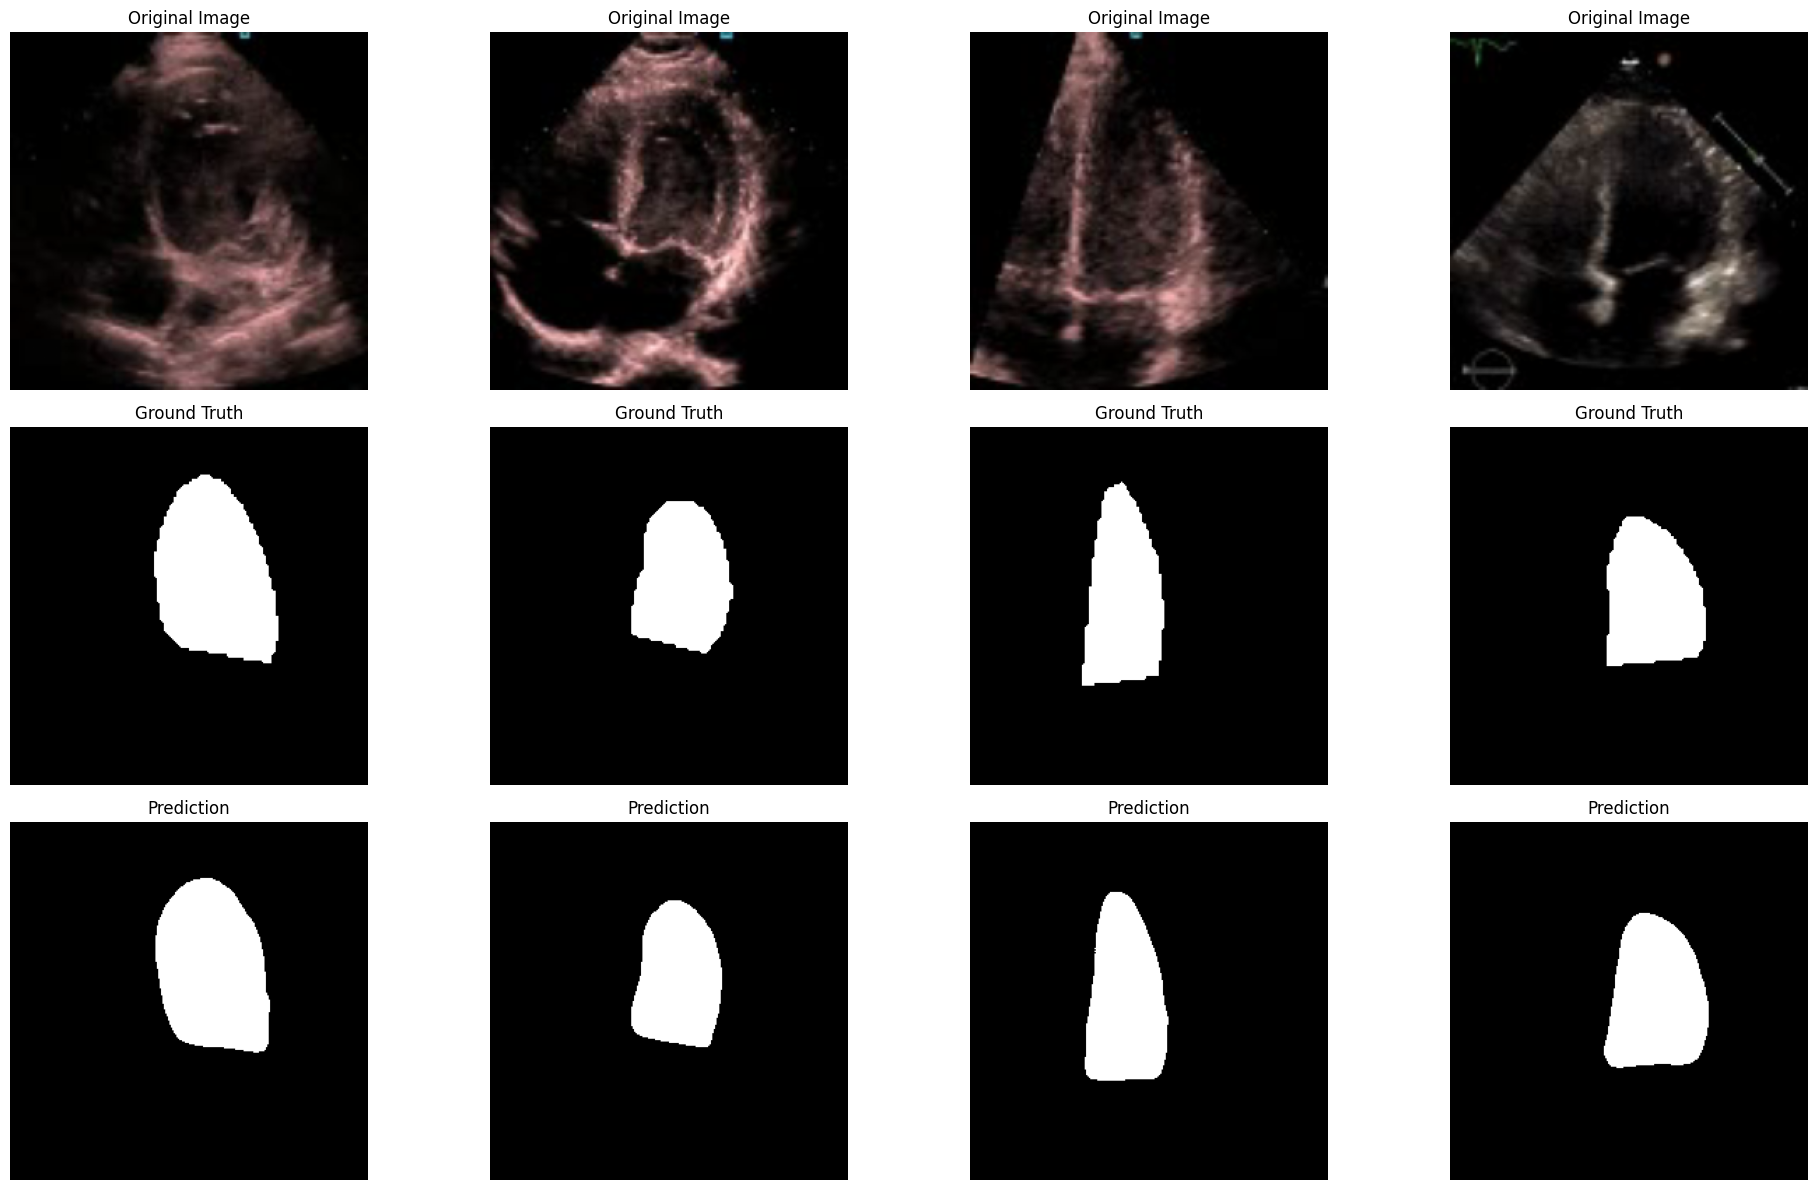

In [15]:
# Plot training curves
def plot_training_curves():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(train_losses, label='Train Loss')
    axes[0, 0].plot(val_losses, label='Val Loss')
    axes[0, 0].set_title('Loss Curves')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # IoU
    axes[0, 1].plot(train_ious, label='Train IoU')
    axes[0, 1].plot(val_ious, label='Val IoU')
    axes[0, 1].set_title('IoU Curves')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('IoU')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Dice
    axes[1, 0].plot(train_dices, label='Train Dice')
    axes[1, 0].plot(val_dices, label='Val Dice')
    axes[1, 0].set_title('Dice Curves')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Dice Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Combined metrics
    axes[1, 1].plot(train_ious, label='Train IoU', alpha=0.7)
    axes[1, 1].plot(val_ious, label='Val IoU', alpha=0.7)
    axes[1, 1].plot(train_dices, label='Train Dice', alpha=0.7)
    axes[1, 1].plot(val_dices, label='Val Dice', alpha=0.7)
    axes[1, 1].set_title('All Metrics')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Visualize predictions
def visualize_predictions(model, test_loader, num_samples=4):
    model.eval()
    
    with torch.no_grad():
        for batch_idx, (images, masks) in enumerate(test_loader):
            if batch_idx >= 1:  # Only show first batch
                break
                
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            pred_masks = torch.sigmoid(outputs) > 0.5
            
            # Move to CPU for visualization
            images = images.cpu()
            masks = masks.cpu()
            pred_masks = pred_masks.cpu()
            
            # Denormalize images
            mean = torch.tensor([0.485, 0.456, 0.406])
            std = torch.tensor([0.229, 0.224, 0.225])
            for i in range(images.shape[0]):
                for c in range(3):
                    images[i, c] = images[i, c] * std[c] + mean[c]
            
            # Plot results
            fig, axes = plt.subplots(3, min(num_samples, images.shape[0]), figsize=(20, 12))
            
            for i in range(min(num_samples, images.shape[0])):
                # Original image
                axes[0, i].imshow(images[i].permute(1, 2, 0))
                axes[0, i].set_title('Original Image')
                axes[0, i].axis('off')
                
                # Ground truth mask
                axes[1, i].imshow(masks[i].squeeze(), cmap='gray')
                axes[1, i].set_title('Ground Truth')
                axes[1, i].axis('off')
                
                # Predicted mask
                axes[2, i].imshow(pred_masks[i].squeeze(), cmap='gray')
                axes[2, i].set_title('Prediction')
                axes[2, i].axis('off')
            
            plt.tight_layout()
            plt.show()
            break

# Plot training curves
plot_training_curves()

# Load best model and evaluate
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Test the model
test_loss, test_iou, test_dice, test_acc = validate_epoch(model, test_loader, criterion, device)
print(f'Test Results:')
print(f'Loss: {test_loss:.4f}')
print(f'IoU: {test_iou:.4f}')
print(f'Dice: {test_dice:.4f}')
print(f'Accuracy: {test_acc:.4f}')

# Visualize predictions
visualize_predictions(model, test_loader, num_samples=4)

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.models.resnet as resnet_module

class ASPPConv(nn.Sequential):
    def __init__(self, in_channels, out_channels, dilation):
        modules = [
            nn.Conv2d(in_channels, out_channels, 3, padding=dilation, dilation=dilation, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        ]
        super(ASPPConv, self).__init__(*modules)

class ASPPPooling(nn.Sequential):
    def __init__(self, in_channels, out_channels):
        super(ASPPPooling, self).__init__(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(in_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True))

    def forward(self, x):
        size = x.shape[-2:]
        x = super(ASPPPooling, self).forward(x)
        return F.interpolate(x, size=size, mode='bilinear', align_corners=True)

class ASPP(nn.Module):
    def __init__(self, in_channels, atrous_rates, out_channels=256):
        super(ASPP, self).__init__()
        modules = []
        modules.append(nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)))

        rates = tuple(atrous_rates)
        for rate in rates:
            modules.append(ASPPConv(in_channels, out_channels, rate))

        modules.append(ASPPPooling(in_channels, out_channels))

        self.convs = nn.ModuleList(modules)

        self.project = nn.Sequential(
            nn.Conv2d(len(self.convs) * out_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5))

    def forward(self, x):
        res = []
        for conv in self.convs:
            res.append(conv(x))
        res = torch.cat(res, dim=1)
        return self.project(res)

class DeepLabV3PlusDecoder(nn.Module):
    def __init__(self, low_level_channels, aspp_channels, output_channels, num_classes):
        super(DeepLabV3PlusDecoder, self).__init__()
        
        self.conv_low = nn.Sequential(
            nn.Conv2d(low_level_channels, 48, 1, bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU(inplace=True)
        )
        
        self.conv_cat = nn.Sequential(
            nn.Conv2d(aspp_channels + 48, output_channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(output_channels),
            nn.ReLU(inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(output_channels, output_channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(output_channels),
            nn.ReLU(inplace=True),
            nn.Dropout(0.1)
        )
        
        self.classifier = nn.Conv2d(output_channels, num_classes, 1)
        
    def forward(self, aspp_features, low_level_features, input_shape):
        low_level_features = self.conv_low(low_level_features)
        
        # Upsample ASPP features to match low-level features dimensions
        aspp_features = F.interpolate(aspp_features, size=low_level_features.shape[2:],
                                    mode='bilinear', align_corners=True)
        
        # Concatenate low-level features with ASPP features
        features = torch.cat([aspp_features, low_level_features], dim=1)
        features = self.conv_cat(features)
        
        # Final classification
        output = self.classifier(features)
        
        # Upsample to original image size
        output = F.interpolate(output, size=input_shape, mode='bilinear', align_corners=True)
        
        return output

# Function to replace standard ResNet with dilated ResNet
def replace_strides_with_dilation(model, dilation_factor=2):
    """
    Modify ResNet to use dilated convolutions in the last 2 layers
    """
    # No dilation for conv1, layer1, layer2
    # For layer3 and layer4, replace stride with dilation
    for layer in [model.layer3, model.layer4]:
        for module in layer.modules():
            if isinstance(module, resnet_module.Bottleneck):
                module.conv2.stride = (1, 1)  # No downsampling
                module.conv2.dilation = (dilation_factor, dilation_factor)
                module.conv2.padding = (dilation_factor, dilation_factor)
                if hasattr(module, 'downsample') and module.downsample is not None:
                    module.downsample[0].stride = (1, 1)
            if hasattr(module, 'stride') and len(module.stride) == 2:
                if module.stride[0] == 2:
                    module.stride = (1, 1)

class DeepLabV3Plus(nn.Module):
    def __init__(self, num_classes=1, output_stride=16):
        super(DeepLabV3Plus, self).__init__()
        
        # Use torchvision's implementation with dilated convolutions
        if output_stride == 16:
            replace_stride_with_dilation = [False, False, True]  # Apply dilation only in layer4
        elif output_stride == 8:
            replace_stride_with_dilation = [False, True, True]   # Apply dilation in layer3 and layer4
        else:
            raise ValueError("Output stride must be 8 or 16!")
            
        # Load the pretrained ResNet50 with proper dilated convs
        backbone = models.resnet50(pretrained=True, replace_stride_with_dilation=replace_stride_with_dilation)
        
        # Extract layers
        self.layer0 = nn.Sequential(
            backbone.conv1, 
            backbone.bn1,
            backbone.relu, 
            backbone.maxpool
        )
        self.layer1 = backbone.layer1  # 1/4
        self.layer2 = backbone.layer2  # 1/8
        self.layer3 = backbone.layer3  # 1/16 or 1/8 if dilated
        self.layer4 = backbone.layer4  # 1/32 or 1/16 if dilated
        
        # ASPP module
        if output_stride == 16:
            aspp_dilations = [1, 6, 12, 18]
        else:  # output_stride == 8
            aspp_dilations = [1, 12, 24, 36]
            
        self.aspp = ASPP(2048, aspp_dilations[1:], 256)
        
        # Decoder
        self.decoder = DeepLabV3PlusDecoder(256, 256, 256, num_classes)
    
    def forward(self, x):
        input_shape = x.shape[-2:]
        
        # Encoder
        x = self.layer0(x)
        x = self.layer1(x)  # 1/4
        low_level_features = x  # Save for decoder
        x = self.layer2(x)  # 1/8
        x = self.layer3(x)  # 1/16
        x = self.layer4(x)  # 1/16 with dilations
        
        # ASPP
        x = self.aspp(x)
        
        # Decoder
        x = self.decoder(x, low_level_features, input_shape)
        
        return x

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DeepLabV3Plus(num_classes=1, output_stride=16).to(device)

print(f"Using device: {device}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

Using device: cuda
Model parameters: 40,347,041


In [25]:
# Loss functions
class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, pred, target):
        pred = torch.sigmoid(pred)
        
        # Flatten tensors
        pred = pred.view(-1)
        target = target.view(-1)
        
        intersection = (pred * target).sum()
        dice = (2. * intersection + self.smooth) / (pred.sum() + target.sum() + self.smooth)
        
        return 1 - dice

class CombinedLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(CombinedLoss, self).__init__()
        self.alpha = alpha
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss()

    def forward(self, pred, target):
        bce_loss = self.bce(pred, target)
        dice_loss = self.dice(pred, target)
        return self.alpha * bce_loss + (1 - self.alpha) * dice_loss

# Training parameters
batch_size = 8
num_epochs = 20
learning_rate = 1e-4

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Optimizer and loss
criterion = CombinedLoss(alpha=0.5)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

print(f"Batch size: {batch_size}")
print(f"Number of epochs: {num_epochs}")
print(f"Learning rate: {learning_rate}")

Batch size: 8
Number of epochs: 20
Learning rate: 0.0001


In [26]:
def calculate_metrics(pred, target, threshold=0.5):
    """Calculate IoU, Dice, and Pixel Accuracy"""
    pred_binary = (torch.sigmoid(pred) > threshold).float()
    target_binary = target
    
    # Flatten tensors
    pred_flat = pred_binary.view(-1)
    target_flat = target_binary.view(-1)
    
    # IoU
    intersection = (pred_flat * target_flat).sum()
    union = pred_flat.sum() + target_flat.sum() - intersection
    iou = (intersection + 1e-8) / (union + 1e-8)
    
    # Dice
    dice = (2 * intersection + 1e-8) / (pred_flat.sum() + target_flat.sum() + 1e-8)
    
    # Pixel Accuracy
    correct = (pred_flat == target_flat).sum()
    pixel_acc = correct / target_flat.numel()
    
    return iou.item(), dice.item(), pixel_acc.item()

def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_iou = 0.0
    running_dice = 0.0
    running_acc = 0.0
    
    for batch_idx, (images, masks) in enumerate(train_loader):
        images, masks = images.to(device), masks.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        iou, dice, acc = calculate_metrics(outputs, masks)
        
        running_loss += loss.item()
        running_iou += iou
        running_dice += dice
        running_acc += acc
        
        if batch_idx % 10 == 0:
            print(f'Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}, IoU: {iou:.4f}')
    
    epoch_loss = running_loss / len(train_loader)
    epoch_iou = running_iou / len(train_loader)
    epoch_dice = running_dice / len(train_loader)
    epoch_acc = running_acc / len(train_loader)
    
    return epoch_loss, epoch_iou, epoch_dice, epoch_acc

def validate_epoch(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_iou = 0.0
    running_dice = 0.0
    running_acc = 0.0
    
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            # Calculate metrics
            iou, dice, acc = calculate_metrics(outputs, masks)
            
            running_loss += loss.item()
            running_iou += iou
            running_dice += dice
            running_acc += acc
    
    epoch_loss = running_loss / len(val_loader)
    epoch_iou = running_iou / len(val_loader)
    epoch_dice = running_dice / len(val_loader)
    epoch_acc = running_acc / len(val_loader)
    
    return epoch_loss, epoch_iou, epoch_dice, epoch_acc

In [27]:
# Training history
train_losses = []
val_losses = []
train_ious = []
val_ious = []
train_dices = []
val_dices = []

best_val_iou = 0.0
best_model_path = '/kaggle/working/best_deeplabV3plusres50_model.pth'

print("Starting training...")
print("=" * 50)

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 30)
    
    # Train
    train_loss, train_iou, train_dice, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, device
    )
    
    # Validate
    val_loss, val_iou, val_dice, val_acc = validate_epoch(
        model, val_loader, criterion, device
    )
    
    # Update learning rate
    scheduler.step(val_loss)
    
    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_ious.append(train_iou)
    val_ious.append(val_iou)
    train_dices.append(train_dice)
    val_dices.append(val_dice)
    
    print(f'Train Loss: {train_loss:.4f}, IoU: {train_iou:.4f}, Dice: {train_dice:.4f}, Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, IoU: {val_iou:.4f}, Dice: {val_dice:.4f}, Acc: {val_acc:.4f}')
    print(f'Current LR: {optimizer.param_groups[0]["lr"]:.6f}')
    
    # Save best model
    if val_iou > best_val_iou:
        best_val_iou = val_iou
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_iou': val_iou,
            'val_loss': val_loss
        }, best_model_path)
        print(f'New best model saved! Val IoU: {val_iou:.4f}')
    
    print()

print("Training completed!")
print(f"Best validation IoU: {best_val_iou:.4f}")

Starting training...
Epoch 1/20
------------------------------
Batch 0/514, Loss: 0.7415, IoU: 0.0991
Batch 10/514, Loss: 0.5470, IoU: 0.4533
Batch 20/514, Loss: 0.4284, IoU: 0.5725
Batch 30/514, Loss: 0.2881, IoU: 0.7585
Batch 40/514, Loss: 0.2548, IoU: 0.7264
Batch 50/514, Loss: 0.2216, IoU: 0.8243
Batch 60/514, Loss: 0.2414, IoU: 0.7596
Batch 70/514, Loss: 0.2588, IoU: 0.7277
Batch 80/514, Loss: 0.2160, IoU: 0.7212
Batch 90/514, Loss: 0.2236, IoU: 0.7504
Batch 100/514, Loss: 0.1746, IoU: 0.8001
Batch 110/514, Loss: 0.2091, IoU: 0.7516
Batch 120/514, Loss: 0.1979, IoU: 0.7355
Batch 130/514, Loss: 0.1632, IoU: 0.7956
Batch 140/514, Loss: 0.2031, IoU: 0.7254
Batch 150/514, Loss: 0.1604, IoU: 0.7931
Batch 160/514, Loss: 0.2104, IoU: 0.7337
Batch 170/514, Loss: 0.1621, IoU: 0.7637
Batch 180/514, Loss: 0.1519, IoU: 0.7947
Batch 190/514, Loss: 0.1645, IoU: 0.7794
Batch 200/514, Loss: 0.1983, IoU: 0.6924
Batch 210/514, Loss: 0.1541, IoU: 0.7796
Batch 220/514, Loss: 0.1657, IoU: 0.7453
Batch

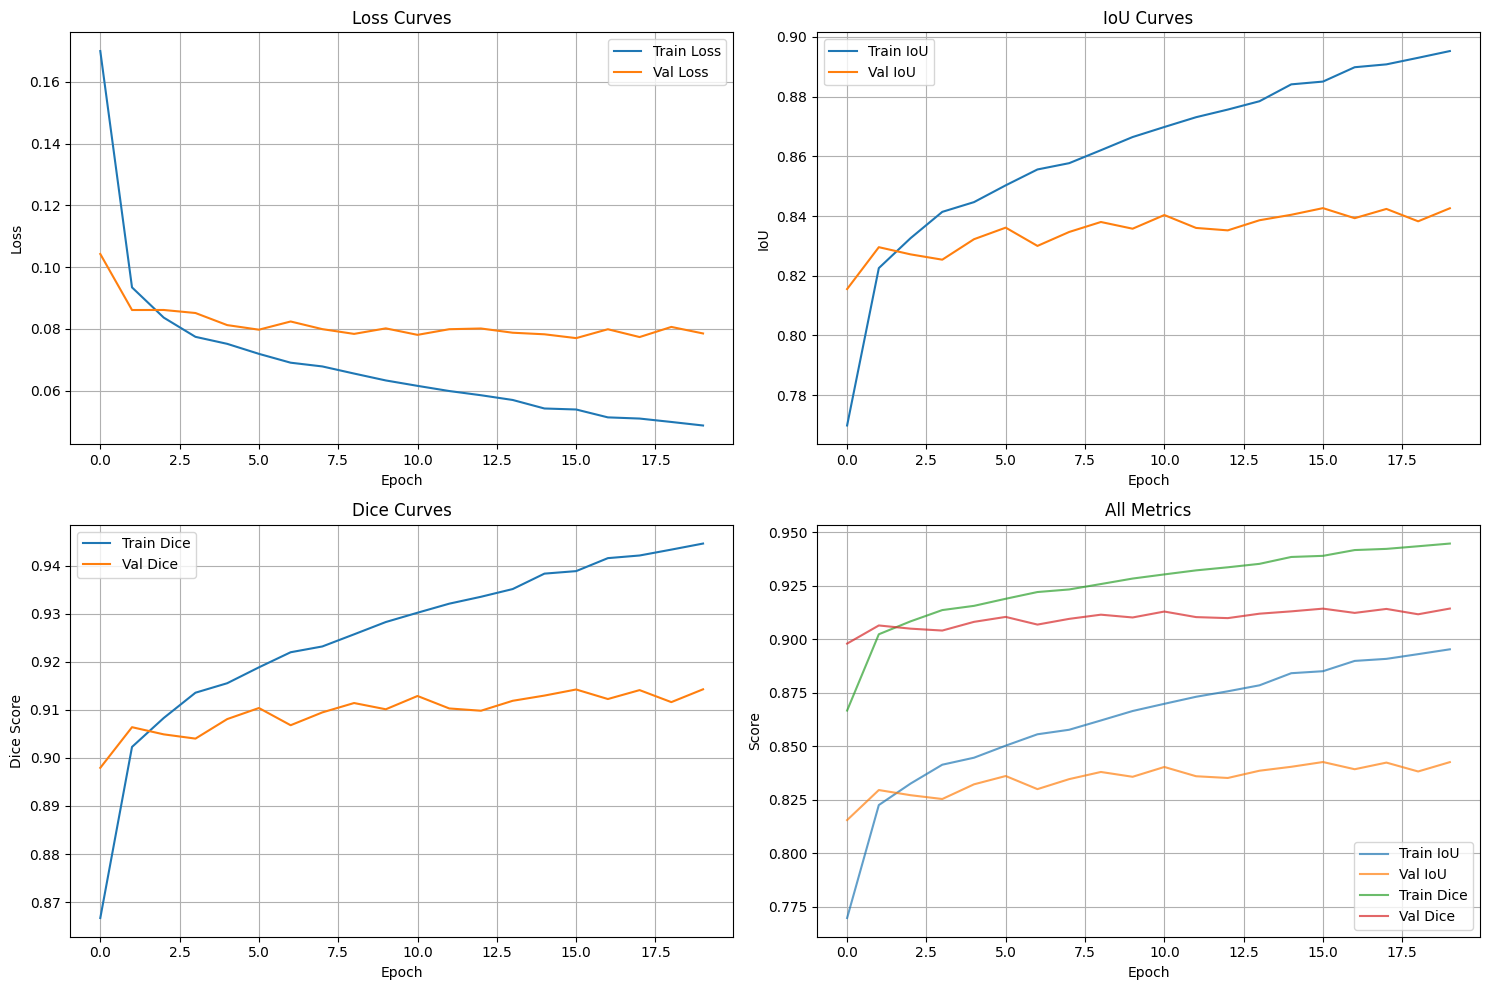

Test Results:
Loss: 0.0769
IoU: 0.8432
Dice: 0.9146
Accuracy: 0.9806


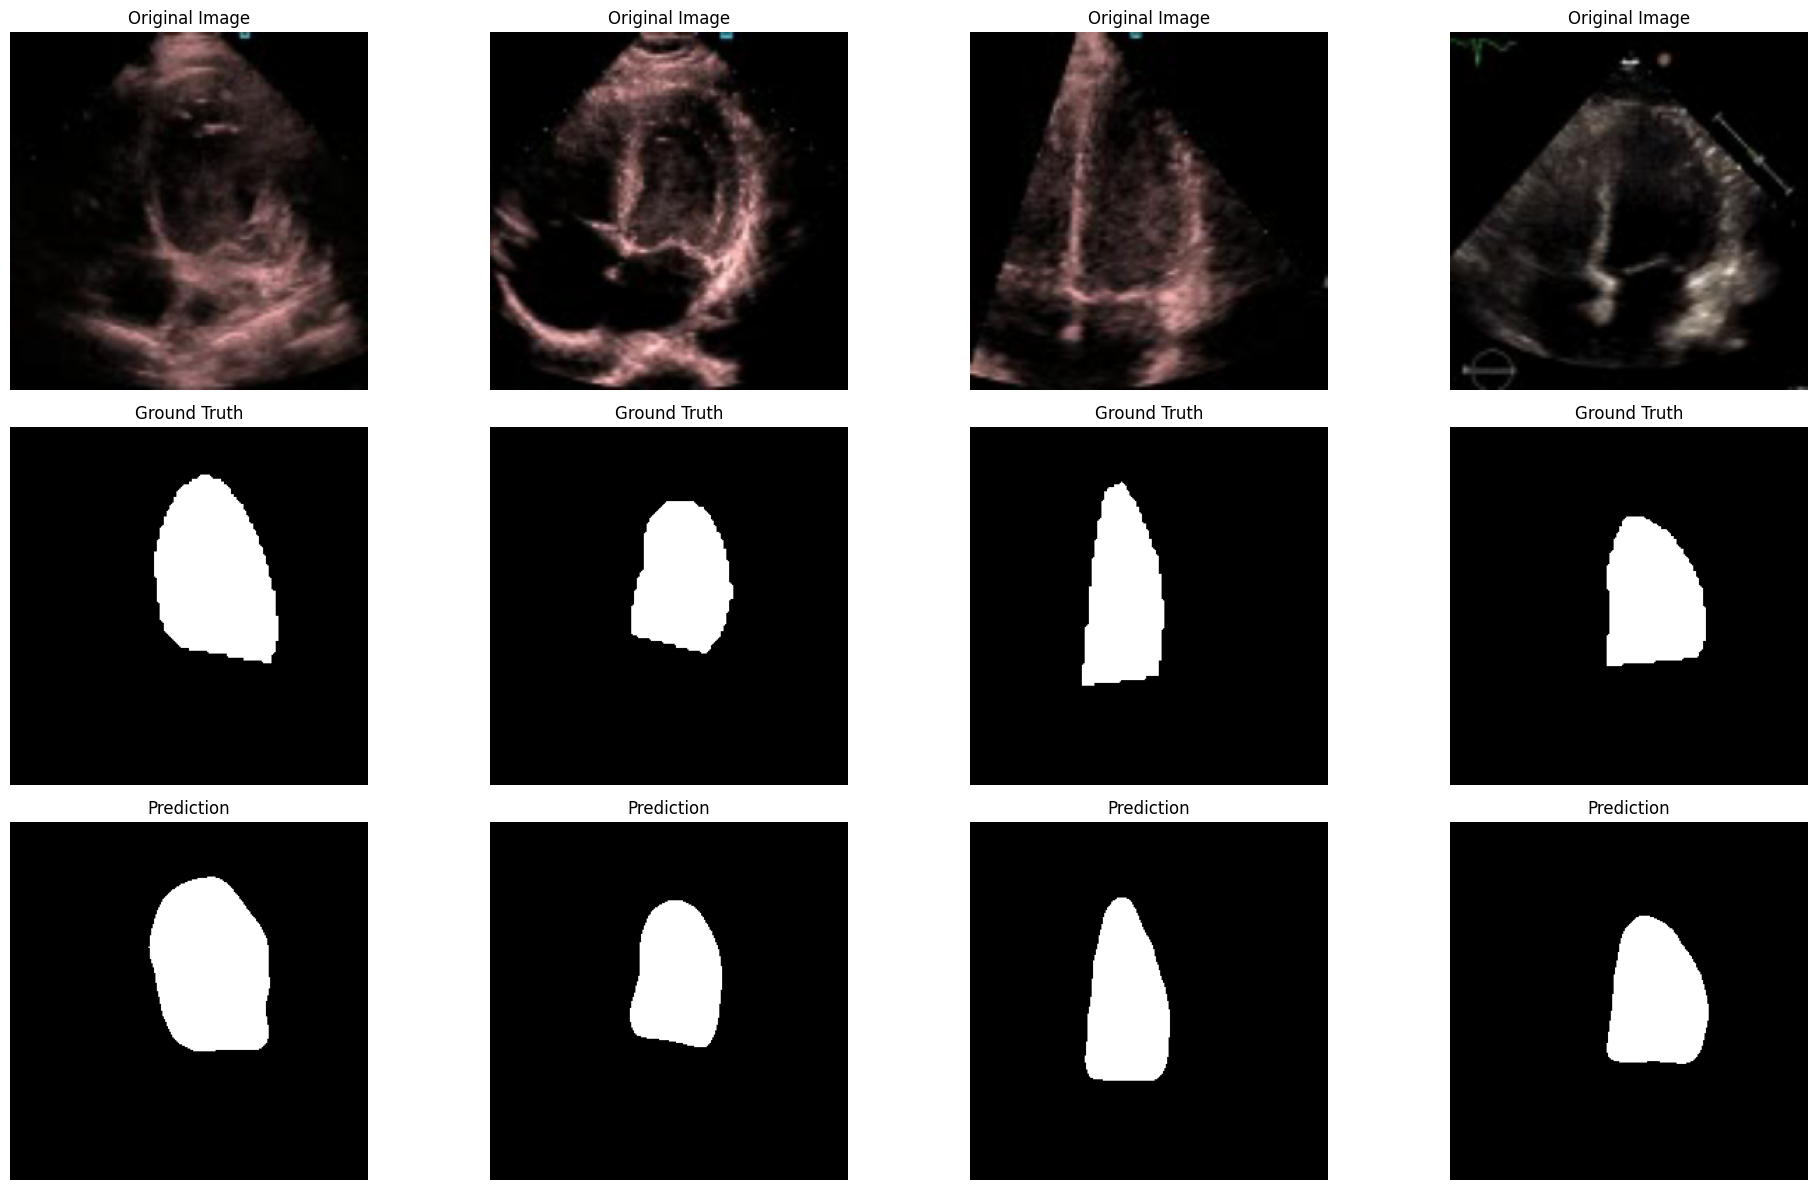

In [28]:
# Plot training curves
def plot_training_curves():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(train_losses, label='Train Loss')
    axes[0, 0].plot(val_losses, label='Val Loss')
    axes[0, 0].set_title('Loss Curves')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # IoU
    axes[0, 1].plot(train_ious, label='Train IoU')
    axes[0, 1].plot(val_ious, label='Val IoU')
    axes[0, 1].set_title('IoU Curves')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('IoU')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Dice
    axes[1, 0].plot(train_dices, label='Train Dice')
    axes[1, 0].plot(val_dices, label='Val Dice')
    axes[1, 0].set_title('Dice Curves')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Dice Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Combined metrics
    axes[1, 1].plot(train_ious, label='Train IoU', alpha=0.7)
    axes[1, 1].plot(val_ious, label='Val IoU', alpha=0.7)
    axes[1, 1].plot(train_dices, label='Train Dice', alpha=0.7)
    axes[1, 1].plot(val_dices, label='Val Dice', alpha=0.7)
    axes[1, 1].set_title('All Metrics')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Visualize predictions
def visualize_predictions(model, test_loader, num_samples=4):
    model.eval()
    
    with torch.no_grad():
        for batch_idx, (images, masks) in enumerate(test_loader):
            if batch_idx >= 1:  # Only show first batch
                break
                
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            pred_masks = torch.sigmoid(outputs) > 0.5
            
            # Move to CPU for visualization
            images = images.cpu()
            masks = masks.cpu()
            pred_masks = pred_masks.cpu()
            
            # Denormalize images
            mean = torch.tensor([0.485, 0.456, 0.406])
            std = torch.tensor([0.229, 0.224, 0.225])
            for i in range(images.shape[0]):
                for c in range(3):
                    images[i, c] = images[i, c] * std[c] + mean[c]
            
            # Plot results
            fig, axes = plt.subplots(3, min(num_samples, images.shape[0]), figsize=(20, 12))
            
            for i in range(min(num_samples, images.shape[0])):
                # Original image
                axes[0, i].imshow(images[i].permute(1, 2, 0))
                axes[0, i].set_title('Original Image')
                axes[0, i].axis('off')
                
                # Ground truth mask
                axes[1, i].imshow(masks[i].squeeze(), cmap='gray')
                axes[1, i].set_title('Ground Truth')
                axes[1, i].axis('off')
                
                # Predicted mask
                axes[2, i].imshow(pred_masks[i].squeeze(), cmap='gray')
                axes[2, i].set_title('Prediction')
                axes[2, i].axis('off')
            
            plt.tight_layout()
            plt.show()
            break

# Plot training curves
plot_training_curves()

# Load best model and evaluate
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Test the model
test_loss, test_iou, test_dice, test_acc = validate_epoch(model, test_loader, criterion, device)
print(f'Test Results:')
print(f'Loss: {test_loss:.4f}')
print(f'IoU: {test_iou:.4f}')
print(f'Dice: {test_dice:.4f}')
print(f'Accuracy: {test_acc:.4f}')

# Visualize predictions
visualize_predictions(model, test_loader, num_samples=4)